In [1]:
import pandas
import pathlib
from matplotlib import pyplot as plt
from config import datadir

import scipy.optimize
import numpy
from tbcontrol.responses import fopdt, sopdt

In [2]:
excel_directory = pandas.read_excel(datadir/'Data Description.xlsx', parse_dates=True, index_col='Start Date') #Loads complete excel directory used to organise datasets
excel_directory

,End Date,Equipment,Type,Purpose,Filename,Run,Description
Start Date,,,,,,,
2019-12-06,2019-12-11,pH Probe,Raw,Test Drift on pH probe,20191206 pH Drift 1.txt,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Raw,Test Drift on pH probe,20191211 pH Drift 2.txt,2,"long run of pH probe drift, performed inside t..."
2019-12-17,2019-12-23,pH Probe,Raw,Test Drift on pH probe,20191217 pH Drift 3.txt,3,"long run of pH probe Drift, circulating ph7 bu..."
2020-01-16,2020-01-16,pH Probe,Raw,Step Test,20200116 pH Step 3.txt,3,pH stepped outside of rig
2020-01-14,2020-01-14,pH Probe,Raw,Step Test,20200114 pH Step 1.broken,1,"pH stepped outside of rig. Probe Broke, Dump run"
2020-01-15,2020-01-15,pH Probe,Raw,Step Test,20200115 pH Step 2.txt,2,pH stepped outside of rig
2020-01-01,2020-01-01,Pumps,Calibration,Calibration,Pump Calibration.xlsx,1,Calibration data for all pumps
2019-12-06,2019-12-11,pH Probe,Drift,Test Drift on pH probe,20191206 pH Drift 1.csv,1,"long run of pH probe drift, performed inside t..."
2019-12-11,2019-12-17,pH Probe,Drift,Test Drift on pH probe,20191211 pH Drift 2.csv,2,"long run of pH probe drift, performed inside t..."


In [3]:
steps = excel_directory[(excel_directory['Type']=='Step Test')]    # Creates a new directory of only the raw data files to be cleaned 
                                                            # Use '&' for multiple conditions

In [4]:
external_steps = pandas.read_csv(datadir /'20200115 pH Step 2.csv')
external_steps

,DateTime,Temp,pH,Boolean Dosing Pump,Gas Analyser CO2,Gas Analyser O2,Air Feed Rate,Feed Rpm,Dosing Rpm,Dosing average?
0,2020-01-15 11:59:11,293.801689,7.074204,0.0,-0.133293,20.541316,-0.595911,-0.264864,0.0,0.0
1,2020-01-15 11:59:12,293.802309,7.074330,0.0,-0.132989,20.539398,-0.595271,-0.340608,0.0,0.0
2,2020-01-15 11:59:13,293.802142,7.075654,0.0,-0.133887,20.540856,-0.587329,-0.340926,0.0,0.0
3,2020-01-15 11:59:14,293.801788,7.079847,0.0,-0.133310,20.543014,-0.579549,-0.342092,0.0,0.0
4,2020-01-15 11:59:15,293.802407,7.082653,0.0,-0.127567,20.541316,-0.579643,-0.340528,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
90683,2020-01-16 13:10:34,293.048022,13.038681,0.0,-0.131598,20.510447,-0.579599,-0.266268,0.0,0.0
90684,2020-01-16 13:10:35,293.048218,13.038362,0.0,-0.132265,20.510907,-0.595716,-0.318001,0.0,0.0
90685,2020-01-16 13:10:36,293.048454,13.038238,0.0,-0.132613,20.513844,-0.569260,-0.263168,0.0,0.0
90686,2020-01-16 13:10:37,293.047766,13.038757,0.0,-0.132558,20.510168,-0.579432,-0.264307,0.0,0.0


In [95]:
span_lower = 20000
span_upper = 80000

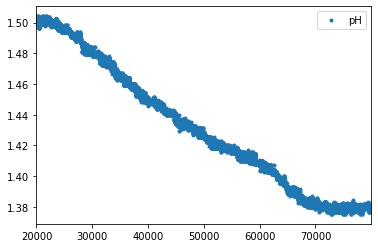

In [96]:
external_steps[span_lower:span_upper].plot(y='pH', style = '.')

Data is definately quantised

Focus on region from 60 000 to 80 000

0 
 1.0    58155
2.0     1845
Name: pH, dtype: int64 

1 
 1.4    40430
1.5    19570
Name: pH, dtype: int64 

2 
 1.38    12295
1.42     5661
1.50     5596
1.43     4776
1.41     4773
1.45     4026
1.40     3669
1.48     3458
1.47     3374
1.44     3359
1.46     3121
1.39     3084
1.49     2808
Name: pH, dtype: int64 

3 
 1.380    3613
1.381    2738
1.418    2007
1.383    1968
1.378    1835
         ... 
1.476       4
1.405       3
1.375       3
1.438       1
1.489       1
Name: pH, Length: 130, dtype: int64 

4 
 1.3799    1226
1.3813    1067
1.3798     981
1.3784     940
1.3785     899
          ... 
1.4351       1
1.4758       1
1.4547       1
1.5002       1
1.4035       1
Name: pH, Length: 772, dtype: int64 

5 
 1.37988    163
1.37990    154
1.37842    149
1.38130    144
1.37844    137
          ... 
1.39594      1
1.38664      1
1.42116      1
1.42109      1
1.49490      1
Name: pH, Length: 4733, dtype: int64 

6 
 1.379880    39
1.379905    39
1.379827    38
1.379873    37
1.37

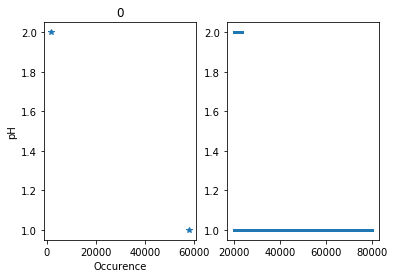

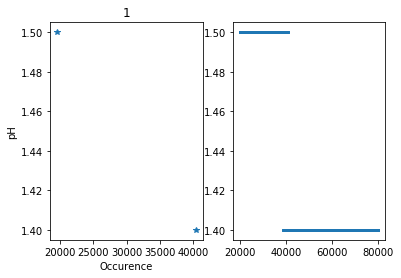

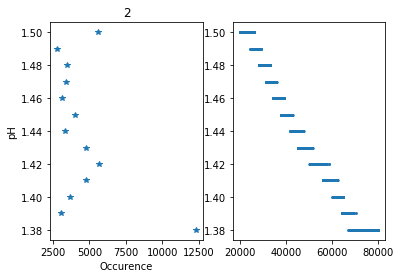

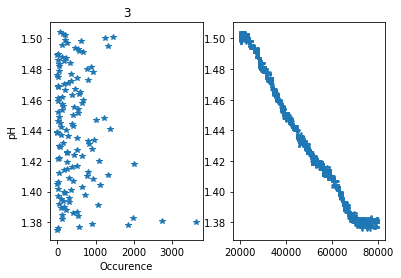

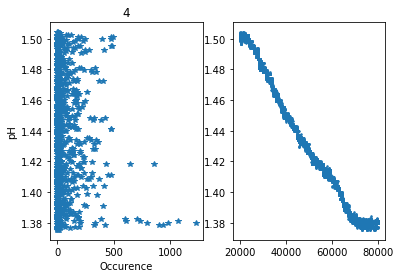

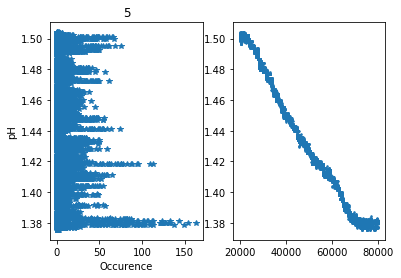

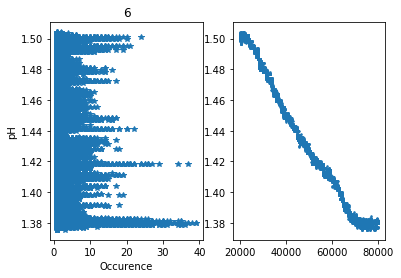

In [103]:
frequency_count_list = []


for decimals in range(7):
    frequency_count = external_steps['pH'][span_lower:span_upper].round(decimals).value_counts()
    frequency_count_list.append(frequency_count)
    
    print(decimals,'\n', (frequency_count), '\n')
    figure = plt.figure()
    
    plt.subplot(121)
    plt.title(decimals)
    plt.xlabel("Occurence")
    plt.ylabel("pH")
    plt.plot(frequency_count.values, frequency_count.index, '*')
    
    plt.subplot(122)
    plt.plot(external_steps['pH'][span_lower:span_upper].round(decimals), '.', markersize=3)
    
    